# Import dataset
A weather dataset of Cluj Napoca was scraped from the Open Weather Map's History API. The data was collected from January 1st 2008 until May 2023 at an hourly rate.

Reference: https://huggingface.co/datasets/LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data/blob/main/Long%20Term%20Time%20Series%20Forecasting%20for%20Cluj-Napoca%20Weather%20Prediction.pdf

In [21]:
# Load the dataset from Hugging Face and display the first few rows:
from datasets import load_dataset
dataset = load_dataset("LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data")
import pandas as pd
df = pd.DataFrame(dataset['train'])
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n


In [29]:
# Assign descriptions to corresponding attributes:
parameter_descriptions = {'dt': 'Time of data calculation, unix, UTC',
 'dt_iso': 'Date and time in UTC format',
 'timezone': 'Shift in seconds from UTC',
 'city_name': 'City name',
 'lat': 'Geographical coordinates of the location (latitude)',
 'lon': 'Geographical coordinates of the location (longitude)',
 'temp': 'Temperature',
 'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.',
 'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
 'feels_like': 'This temperature parameter accounts for the human perception of weather',
 'temp_min': 'Minimum temperature at the moment (optional)',
 'temp_max': 'Maximum temperature at the moment (optional)',
 'pressure': 'N/A',
 'sea_level': 'N/A',
 'grnd_level': 'N/A',
 'humidity': 'Humidity, %',
 'wind_speed': 'N/A',
 'wind_deg': 'Wind direction, degrees (meteorological)',
 'wind_gust': 'N/A',
 'rain_1h': 'Rain volume for the last hour, mm',
 'rain_3h': 'Rain volume for the last 3 hours, mm',
 'snow_1h': 'Snow volume for the last hour, mm (in liquid state)',
 'snow_3h': 'Snow volume for the last 3 hours, mm (in liquid state)',
 'clouds_all': 'Cloudiness, %',
 'weather_id': 'Weather condition id',
 'weather_main': 'Group of weather parameters (Rain, Snow, Extreme etc.)',
 'weather_description': 'Weather condition within the group',
 'weather_icon': 'Weather icon id'}

{'dt': 'Time of data calculation, unix, UTC', 'dt_iso': 'Date and time in UTC format', 'timezone': 'Shift in seconds from UTC', 'city_name': 'City name', 'lat': 'Geographical coordinates of the location (latitude)', 'lon': 'Geographical coordinates of the location (longitude)', 'temp': 'Temperature', 'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.', 'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form', 'feels_like': 'This temperature parameter accounts for the human perception of weather', 'temp_min': 'Minimum temperature at the moment (optional)', 'temp_max': 'Maximum temperature at the moment (optional)', 'pressure': 'N/A', 'sea_level': 'N/A', 'grnd_level': 'N/A', 'humidity': 'Humidity, %', 'wind_speed': '

# Get general information of the dataset

In [16]:
# Check the total number of rows and columns:
df.shape

(139394, 28)

In [14]:
# Display the data type and count non-null values in each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139394 entries, 0 to 139393
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   139394 non-null  int64  
 1   dt_iso               139394 non-null  object 
 2   timezone             139394 non-null  int64  
 3   city_name            139394 non-null  object 
 4   lat                  139394 non-null  float64
 5   lon                  139394 non-null  float64
 6   temp                 139394 non-null  float64
 7   visibility           137498 non-null  float64
 8   dew_point            139391 non-null  float64
 9   feels_like           139394 non-null  float64
 10  temp_min             139394 non-null  float64
 11  temp_max             139394 non-null  float64
 12  pressure             139394 non-null  int64  
 13  sea_level            0 non-null       object 
 14  grnd_level           0 non-null       object 
 15  humidity         

In [220]:
# View general statistics figure of numeric data:
df.describe()

,dt,dt_iso,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,...,snow_1h,snow_3h,clouds_all,weather_id,hour,day,month,year,weekday,z_scores
count,1.393940e+05,139394,139394.000000,1.393940e+05,1.393940e+05,139394.000000,137498.000000,139391.000000,139394.000000,139394.000000,...,4572.000000,821.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,1.393940e+05
mean,1.440551e+09,2015-08-26 01:04:18.157453056,9251.649282,4.676714e+01,2.359214e+01,9.618191,8693.875169,5.084661,8.529267,8.327400,...,0.361105,0.908526,38.215605,728.715253,11.486678,15.747708,6.431346,2015.156212,2.999648,6.792245e-18
min,1.199146e+09,2008-01-01 00:00:00,7200.000000,4.676714e+01,2.359214e+01,-9998.770000,49.000000,-24.390000,-10005.770000,-9998.960000,...,0.100000,0.100000,0.000000,200.000000,0.000000,1.000000,1.000000,2008.000000,0.000000,-8.910258e-02
25%,1.319538e+09,2011-10-25 10:15:00,7200.000000,4.676714e+01,2.359214e+01,2.240000,9999.000000,-0.450000,0.690000,0.840000,...,0.160000,0.200000,0.000000,701.000000,5.000000,8.000000,3.000000,2011.000000,1.000000,-5.071104e-02
50%,1.440347e+09,2015-08-23 16:30:00,10800.000000,4.676714e+01,2.359214e+01,9.700000,10000.000000,5.150000,8.800000,8.450000,...,0.260000,0.500000,20.000000,800.000000,11.000000,16.000000,6.000000,2015.000000,3.000000,-1.455590e-02
75%,1.561060e+09,2019-06-20 19:45:00,10800.000000,4.676714e+01,2.359214e+01,16.910000,10000.000000,11.350000,16.700000,15.750000,...,0.450000,1.000000,75.000000,801.000000,18.000000,23.000000,10.000000,2019.000000,5.000000,2.644477e-02
max,1.682982e+09,2023-05-01 23:00:00,10800.000000,4.676714e+01,2.359214e+01,37.610000,10000.000000,25.190000,37.740000,37.000000,...,2.280000,9.000000,100.000000,804.000000,23.000000,31.000000,12.000000,2023.000000,6.000000,3.726070e+02
std,1.396620e+08,NaN,1782.328653,8.589071e-11,4.349603e-11,47.385004,2743.282608,7.568612,47.556514,47.396329,...,0.300892,1.108691,38.417129,121.070155,6.933733,8.794145,3.496357,4.428140,2.000242,1.000000e+00


As observed, there are 139394 rows and 28 columns in total, in which no data on sea level and ground level have been recorded (0 non-null values are detected in 'sea_level' and 'grnd_level' columns). 

# Data cleaning and preparation


We will now introduce a cleaned_df dataframe, that stores the results after each cleaning step. The copy() function specify that this is a new and separate dataframe that is not just a reference to the orignial one.

In [222]:
cleaned_df = df.copy()

## Check number of missing values in each column

In [224]:
df.isna().sum()

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility               1896
dew_point                   3
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              139394
grnd_level             139394
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              128479
rain_1h                120367
rain_3h                137547
snow_1h                134822
snow_3h                138573
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
hour                        0
day                         0
month                       0
year                        0
weekday                     0
z_scores  

## Check duplication 

In [226]:
df.loc[df.duplicated()]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday,z_scores


There are no exact duplicated records.

In [177]:
df.loc[df.duplicated(subset=['dt','dt_iso', 'timezone', 'city_name', 'lat', 'lon'])].sort_values(by=['dt'])

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday,z_scores
18,1199206800,2008-01-01 17:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-5.21,4000.0,-5.93,-5.21,...,600,Snow,light snow,13n,17,1,1,2008,1,-0.051829
20,1199210400,2008-01-01 18:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.69,4000.0,-5.41,-4.69,...,600,Snow,light snow,13n,18,1,1,2008,1,-0.051829
22,1199214000,2008-01-01 19:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.42,4000.0,-5.14,-4.42,...,600,Snow,light snow,13n,19,1,1,2008,1,-0.089103
24,1199217600,2008-01-01 20:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.15,2000.0,-4.75,-4.15,...,600,Snow,light snow,13n,20,1,1,2008,1,-0.089103
26,1199221200,2008-01-01 21:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-3.87,2000.0,-4.47,-3.87,...,600,Snow,light snow,13n,21,1,1,2008,1,-0.051829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138774,1680768000,2023-04-06 08:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.11,2000.0,-1.93,-5.13,...,701,Mist,mist,50d,8,6,4,2023,3,0.102482
138776,1680771600,2023-04-06 09:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.34,5000.0,-2.39,-4.27,...,701,Mist,mist,50d,9,6,4,2023,3,0.083473
138778,1680775200,2023-04-06 10:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.59,5000.0,-1.30,-4.61,...,701,Mist,mist,50d,10,6,4,2023,3,0.127456
138782,1680786000,2023-04-06 13:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.68,5000.0,-2.09,-4.49,...,701,Mist,mist,50d,13,6,4,2023,3,0.127456


However, within specific time and location subsets, there are 4,994 duplicate instances — meaning multiple records exist for the same location at the exact same timestamp. This can occur due to data being collected from multiple sources or sensors, variations between forecasted and observed data, or delays and overlaps in data reporting and aggregation.

It is not possible to conclude which record might be the accurate data. Hence, we will keep this for further analysis at this moment.

In [229]:
count = df['dt'].value_counts()
count.sort_values(ascending=False)

dt
1680577200    3
1639692000    3
1640602800    3
1640599200    3
1640595600    3
             ..
1657904400    1
1657908000    1
1657911600    1
1657915200    1
1682982000    1
Name: count, Length: 134400, dtype: int64

In [231]:
cleaned_df.query('dt==1199664000')

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday,z_scores
159,1199664000,2008-01-07,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.06,10000.0,-1.33,-0.06,...,500,Rain,light rain,10n,0,7,1,2008,0,-0.051829
160,1199664000,2008-01-07,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.06,10000.0,-1.33,-0.06,...,600,Snow,light snow,13n,0,7,1,2008,0,-0.051829


Once decided to drop some records, we will reset the dataframe index.

In [253]:
# cleaned_df.reset_index(drop=True)

## Reformat date data
The date time is currently in an 'object' type. We will convert this into date time format for easier manipulations.

In [258]:
# Parse datetime and extract time features
df['dt_iso'] = pd.to_datetime(df['dt_iso'].str.replace(' +0000 UTC', '', regex=False))
df['hour'] = df['dt_iso'].dt.hour
df['day'] = df['dt_iso'].dt.day
df['month'] = df['dt_iso'].dt.month
df['year'] = df['dt_iso'].dt.year
df['weekday'] = df['dt_iso'].dt.weekday

print( df.head())

AttributeError: Can only use .str accessor with string values!

## Check unique values

In [242]:
for i in df.columns[2:6]:
    print(f'Unique values of {i} are {pd.unique(df[i])}')

Unique values of timezone are [ 7200 10800]
Unique values of city_name are ['Universitatea Babeș-Bolyai din Cluj-Napoca']
Unique values of lat are [46.767141]
Unique values of lon are [23.592139]


Except for the timezones, since Cluj-Napoca shifts time in Summer (Daylight Saving Time). We will, however, drop the other attributes that are not necessary for further actions.

## Drop attributes
We decide to drop 'sea_level' and 'grnd_level' attributes because they contain no accessible data. 'city_name', 'lat', and 'lon' are also to be omitted as all the values of these attributes are referring to the same location. Likewise, we exclude 'dt' and 'time_zone' columns due to their unnecessary presence in the analysis.

In [262]:
# Drop redundant columns: 
cleaned_df = df.drop(['dt', 'timezone', 'city_name', 'lat', 'lon', 'sea_level', 'grnd_level'], axis=1).copy()
cleaned_df

,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday,z_scores
0,2008-01-01 00:00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,92,1.00,...,600,Snow,light snow,13n,0,1,1,2008,1,-0.051829
1,2008-01-01 01:00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,92,1.00,...,600,Snow,light snow,13n,1,1,1,2008,1,-0.051829
2,2008-01-01 02:00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,92,1.00,...,600,Snow,light snow,13n,2,1,1,2008,1,-0.051829
3,2008-01-01 03:00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,92,1.00,...,804,Clouds,overcast clouds,04n,3,1,1,2008,1,-0.051829
4,2008-01-01 04:00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,93,1.00,...,701,Mist,mist,50n,4,1,1,2008,1,-0.051829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,2023-05-01 19:00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,58,0.51,...,800,Clear,sky is clear,01n,19,1,5,2023,0,-0.070093
139390,2023-05-01 20:00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,71,1.03,...,800,Clear,sky is clear,01n,20,1,5,2023,0,-0.050711
139391,2023-05-01 21:00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,76,1.03,...,800,Clear,sky is clear,01n,21,1,5,2023,0,-0.050711
139392,2023-05-01 22:00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,81,0.51,...,800,Clear,sky is clear,01n,22,1,5,2023,0,-0.070093


## Check semantic accuracy
According to real data, −89.2°C is the coldest point ever recorded on Earth, i.e., in Antarctica; 56.7°C is the hottest point recorded on Earth, specifically in Death Valley, USA. The valid domain for the 'temp', 'feels_like', 'temp_min', 'temp_max' attributes is thus (-90, 60). The valid range for pressure, on the other hand, is 870 – 1085 hPa.

In [268]:
# Define realistic value ranges for filtering
import numpy as np
valid_ranges = {
    'temp': (-90, 60),
    'feels_like': (-90, 60),
    'temp_min': (-90, 60),
    'temp_max': (-90, 60),
    'pressure': (870, 1085),
}

# Filter rows based on valid ranges
mask = np.ones(len(df), dtype=bool)
for col, (low, high) in valid_ranges.items():
    mask &= df[col].between(low, high) 

## Data Visualization

### Temp and Feels-like

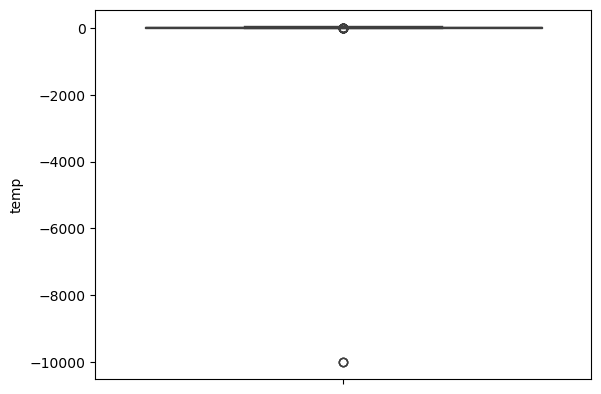

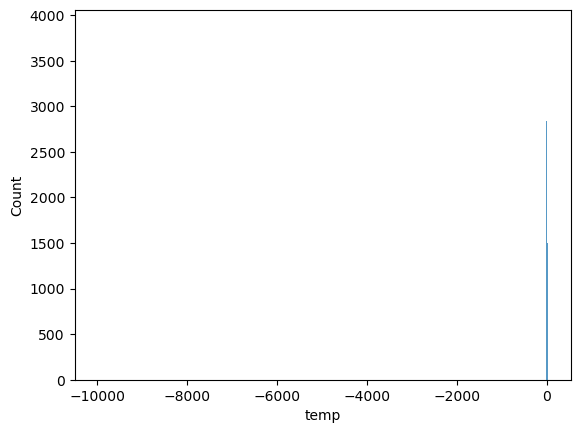

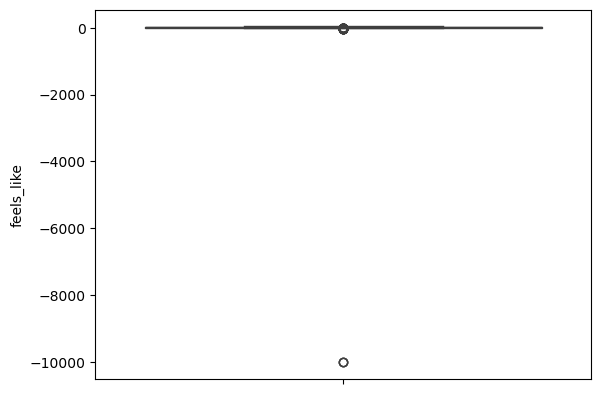

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.boxplot(df['temp'])
plt.show()
sns.histplot(df['temp'])
plt.show()

sns.boxplot(df['feels_like'])
plt.show()


In [86]:
df['temp'].min(), df['temp'].max(), df['feels_like'].min(), df['feels_like'].max()

(-9998.77, 37.61, -10005.77, 37.74)

In [170]:
# By looking at the box plot above, we notice there are no positive outliers, so we only consider negative outliers as shown in the plot. 
outliers = df[(df['temp'] < -90) | (df['feels_like'] < -90)]
outliers


,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday,z_scores
138339,1679324400,2023-03-20 15:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,800,Clear,sky is clear,01d,15,20,3,2023,0,-0.042884
138604,1680271200,2023-03-31 14:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,802,Clouds,scattered clouds,03d,14,31,3,2023,4,-0.010456
138804,1680861600,2023-04-07 10:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,804,Clouds,overcast clouds,04d,10,7,4,2023,4,372.607020


There are only 3 outliers in Temp and Feels-like, which is very marginal compared to the total number of data entries. Therefore, we decide to drop these outliers.

In [166]:
df_cleaned = df.drop(outliers.index).copy()
df_cleaned

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday,z_scores
0,1199145600,2008-01-01 00:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,600,Snow,light snow,13n,0,1,1,2008,1,-0.051829
1,1199149200,2008-01-01 01:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,600,Snow,light snow,13n,1,1,1,2008,1,-0.051829
2,1199152800,2008-01-01 02:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,600,Snow,light snow,13n,2,1,1,2008,1,-0.051829
3,1199156400,2008-01-01 03:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,804,Clouds,overcast clouds,04n,3,1,1,2008,1,-0.051829
4,1199160000,2008-01-01 04:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,701,Mist,mist,50n,4,1,1,2008,1,-0.051829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,800,Clear,sky is clear,01n,19,1,5,2023,0,-0.070093
139390,1682971200,2023-05-01 20:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,800,Clear,sky is clear,01n,20,1,5,2023,0,-0.050711
139391,1682974800,2023-05-01 21:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,800,Clear,sky is clear,01n,21,1,5,2023,0,-0.050711
139392,1682978400,2023-05-01 22:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,800,Clear,sky is clear,01n,22,1,5,2023,0,-0.070093


### Visibility


In [104]:
df['visibility'].describe()

count    137498.000000
mean       8693.875169
std        2743.282608
min          49.000000
25%        9999.000000
50%       10000.000000
75%       10000.000000
max       10000.000000
Name: visibility, dtype: float64

At first glance, the visibility data appears reasonable, ranging from a minimum of 49 meters to a maximum of 10,000 meters. the latter typically indicating perfectly clear conditions with no significant obstructions.

<Axes: xlabel='visibility', ylabel='Count'>

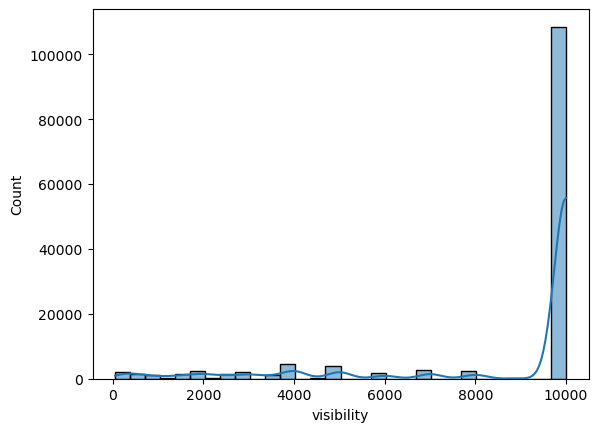

In [108]:
sns.histplot(df['visibility'], bins=30, kde=True)

### Dew point

In [111]:
df[df['dew_point'].isna()]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
138339,1679324400,2023-03-20 15:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,0,800,Clear,sky is clear,01d,15,20,3,2023,0
138604,1680271200,2023-03-31 14:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,40,802,Clouds,scattered clouds,03d,14,31,3,2023,4
138804,1680861600,2023-04-07 10:00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,100,804,Clouds,overcast clouds,04d,10,7,4,2023,4


There were 3 records with missing dew_point values, which also corresponded to temperature outliers. These records were identified as bad data and have been removed from cleaned_df. We  thus do not have to take any action.

### Humidity 

<Axes: xlabel='humidity', ylabel='Count'>

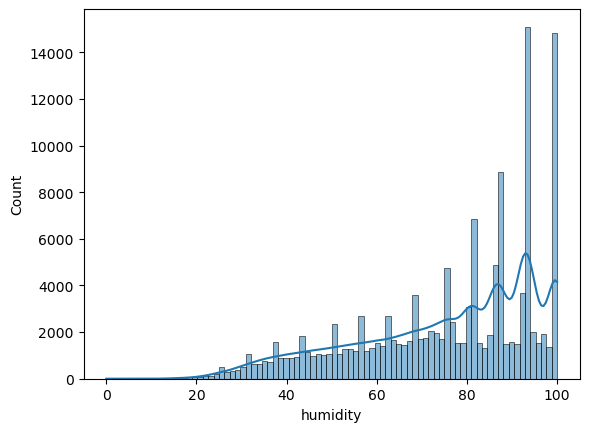

In [116]:
sns.histplot(df['humidity'], kde=True)

The histogram of humidity appears normal, with no suspicious values. Therefore, we will keep the data intact for now.


### Summary 
- 'dt', 'timezone', 'city_name', 'lat', 'lon', 'sea_level', 'grnd_level' columns are dropped. 
- Some data are recorded in the same location and timeframe, but are retained.
- Date data are reformatted, and time features are extracted.
- Sorted the dataframe by date and time in ascending order.
- Outlier records with 'temp', 'feels-like', 'dew_point', and 'pressure' are detected and removed.
- Null values in 'dew_point' are removed. Those in 'visibility', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', and 'snow_3h' remain in the cleaned dataset.

### Feature Relationships

In [260]:
cleaned_df.columns
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139391 entries, 0 to 139393
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt                   139391 non-null  int64         
 1   dt_iso               139391 non-null  datetime64[ns]
 2   timezone             139391 non-null  int64         
 3   city_name            139391 non-null  object        
 4   lat                  139391 non-null  float64       
 5   lon                  139391 non-null  float64       
 6   temp                 139391 non-null  float64       
 7   visibility           137498 non-null  float64       
 8   dew_point            139391 non-null  float64       
 9   feels_like           139391 non-null  float64       
 10  temp_min             139391 non-null  float64       
 11  temp_max             139391 non-null  float64       
 12  pressure             139391 non-null  int64         
 13  sea_level          

#### Scatter Plot

<Axes: xlabel='dt_iso', ylabel='temp'>

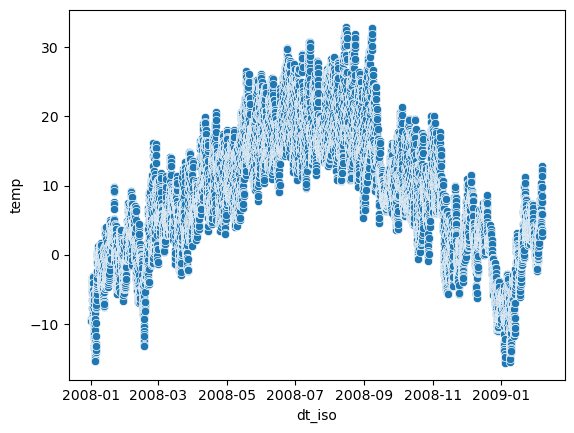

In [144]:
sns.scatterplot(x = cleaned_df['dt_iso'].head(10000), y = cleaned_df['temp'].head(10000))

This is an example of temperature values over time, which clearly follow a seasonal pattern, reflecting typical weather changes throughout the year.

#### Correlation
To gaining insights into how different factors may influence each other, we generate a the correlation heatmap using Seaborn’s built-in function.

<Axes: >

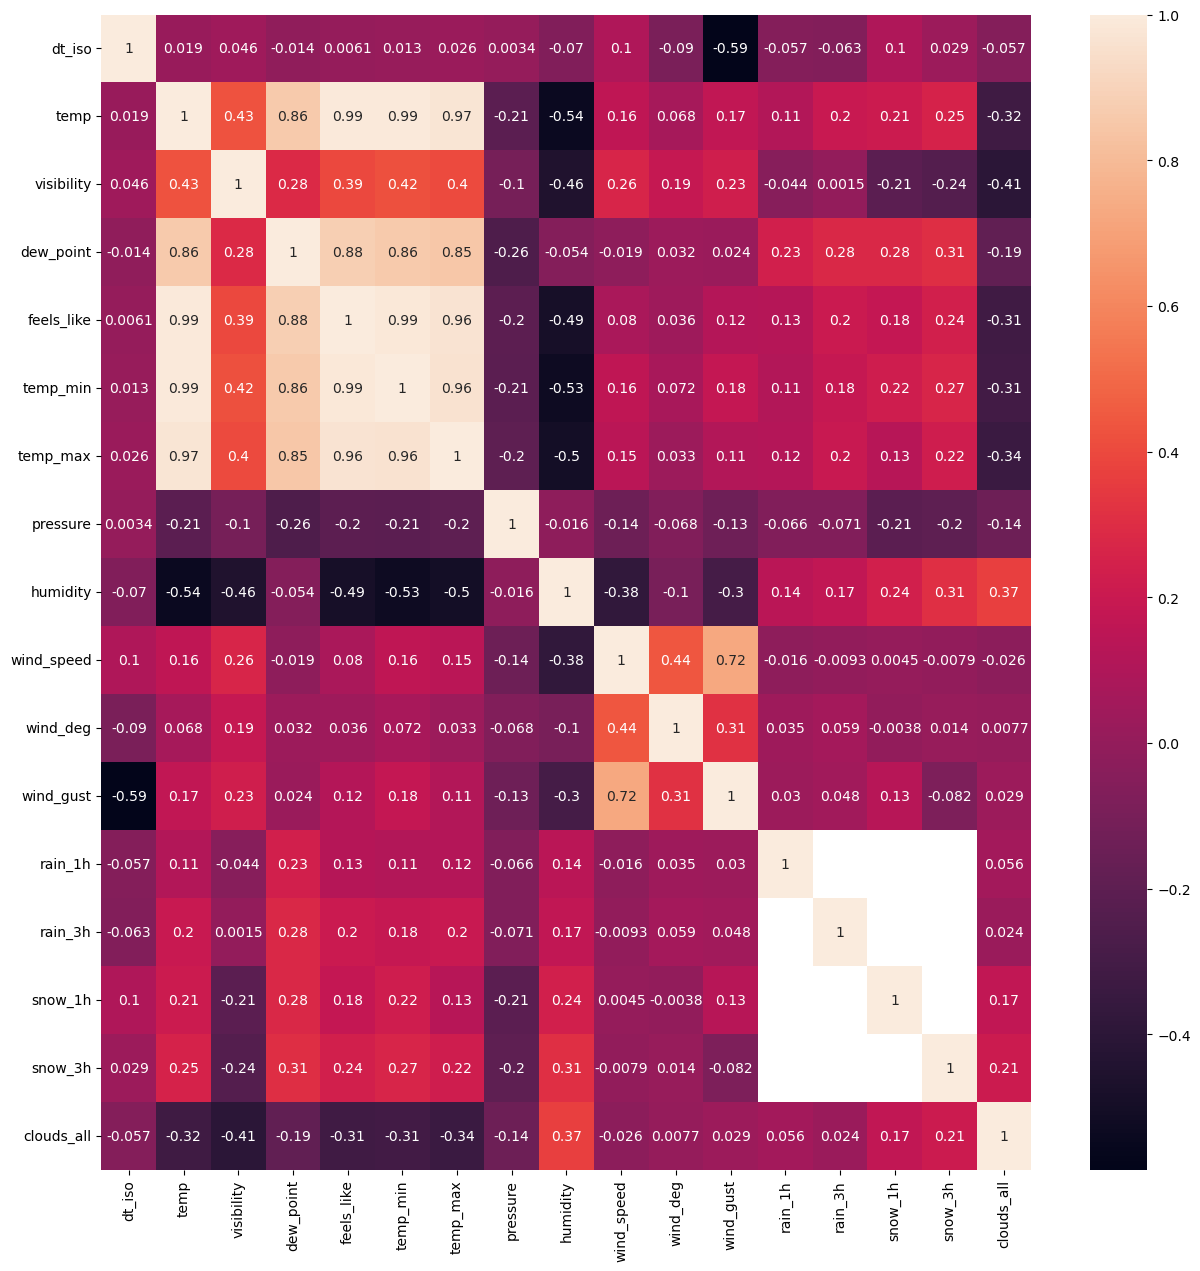

In [184]:
df_corr = df_cleaned[['dt_iso', 'temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max', \
                      'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',\
                      'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all'\
                      ]].corr()
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)